In [1]:
#sourced from https://github.com/giuseppebrb/sklearn-examples

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# diabetes = datasets.load_diabetes()
# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

In [4]:
diabetes = datasets.load_diabetes(as_frame=True)


In [5]:
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
from IPython.display import Markdown, display

display(Markdown(diabetes.DESCR))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [8]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [10]:
X = diabetes.data
y = diabetes.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(353, 10)

In [13]:
# y_test

In [14]:
model = linear_model.LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print('Coefficients: ', model.coef_)

Coefficients:  [  23.57407224 -223.03477419  480.84322907  364.94026302 -804.02188704
  574.71756082   -6.77457473  -17.58434926  736.97122796   66.89462899]


In [50]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917
199,0.041708,-0.044642,-0.045007,0.034508,0.043837,-0.015719,0.037595,-0.014401,0.089897,0.007207
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
127,0.034443,0.050680,-0.001895,-0.012556,0.038334,0.013717,0.078093,-0.039493,0.004548,-0.096346
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783
...,...,...,...,...,...,...,...,...,...,...
99,-0.001882,-0.044642,-0.064408,0.011544,0.027326,0.037517,-0.013948,0.034309,0.011785,-0.054925
308,0.001751,-0.044642,-0.046085,-0.033213,-0.073119,-0.081480,0.044958,-0.069383,-0.061176,-0.079778
19,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008943,-0.054925
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129021,0.056912


In [49]:
predictions = model.predict(X_test)

In [51]:
predictions

array([254.47507876, 179.67259745, 186.82492927, 112.35078767,
       112.22142568, 157.87962188, 117.31055411, 122.16017011,
       235.63356445, 226.04614865,  91.01766754, 201.55417348,
       163.21758917,  69.24419689, 217.67488986,  64.62241713,
        76.86716914, 153.82693865, 143.42908493, 155.15381433,
       151.93430059, 137.92397981,  78.69841997,  79.04340029,
       189.43384175,  88.52168177, 102.73539488, 123.4711047 ,
       163.87626366, 183.94408021,  91.5210392 , 162.19392996,
       176.60225923, 155.59757309, 161.37485042, 217.80739073,
       119.88540701, 160.60704409,  60.49106362, 151.41992904,
       199.02216665, 210.54841432, 118.59436606, 184.64653215,
       181.19985528, 178.37967447, 162.81358895, 112.5417346 ,
       182.41446042, 124.18469186,  40.79388007, 164.26906527,
       176.26296517, 234.09352672, 142.14122331, 196.51513361,
       162.55497249, 144.88900355, 166.36789369, 143.7766544 ,
       146.43239674, 216.26442135,  95.39946842, 144.11

In [52]:
y_test

32     341.0
199     90.0
17     144.0
127    109.0
425    152.0
       ...  
99      83.0
308    114.0
19     168.0
323    248.0
336    306.0
Name: target, Length: 89, dtype: float64

In [17]:
print('Intercept: ', model.intercept_)

Intercept:  152.9270662943586


In [19]:
print('Mean Squared Error (MSE): %2f' % mean_squared_error(y_test, predictions))
print('Coefficient of determination (R^2): %2f' % r2_score(y_test, predictions))

Mean Squared Error (MSE): 2921.289348
Coefficient of determination (R^2): 0.504961


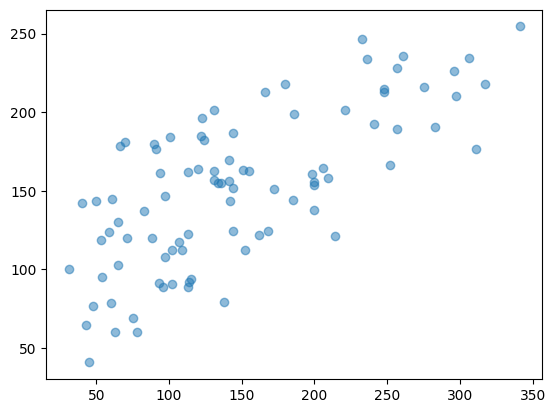

In [15]:
model_plot = plt.scatter(y_test, predictions, alpha=0.5)
plt.show()

In [26]:
feature_names = diabetes.feature_names
coefficients = model.coef_

In [53]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [54]:
coefficients

array([  20.95579422, -215.95773816,  504.78279857,  349.93579908,
       -730.34665746,  451.26487201,   40.06437053,   62.81591181,
        721.37469494,   73.95030777])

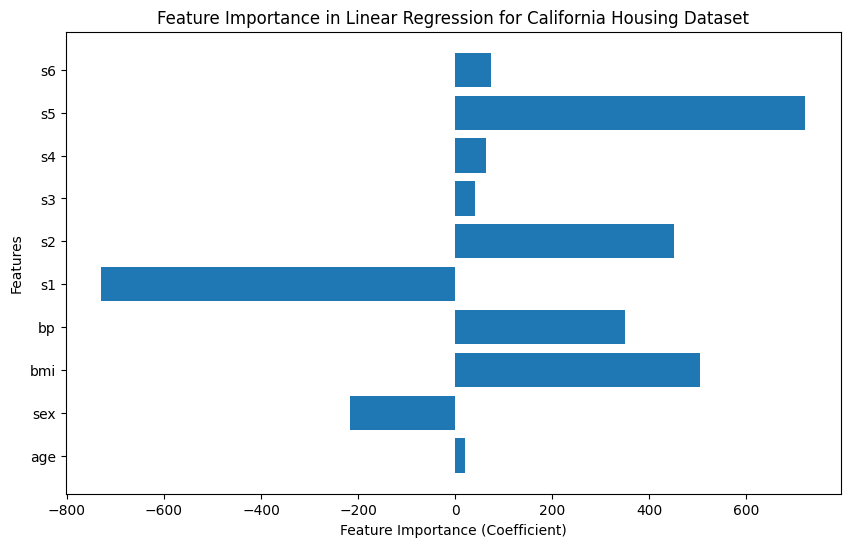

In [27]:
# Get the coefficients (feature importance) of the linear regression model coefficients = model.coef
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression for California Housing Dataset")
plt.show()